In [1]:
# %pushd book-materials
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(10, 6))

PREVIOUS_MAX_ROWS = pd.options.display.max_rows

pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

np.set_printoptions(precision=4, suppress=True)

# Date and Time Data Types and Tools

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2023, 2, 22, 7, 49, 40, 723692)

In [3]:
now.year, now.month, now.day

(2023, 2, 22)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
#timedelta() - represents the difference between two datetime values (as days, seconds, and micro- seconds)
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

# Converting between string and datetime

In [9]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [11]:
# datetime.strptime is the best way to parse a date with a known format
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [14]:
# pass dayfirst=True to indicate day appearing before month
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None]) #None turns to NaT
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
idx[2]

NaT

In [19]:
pd.isna(idx)

array([False, False,  True])

# Time Series Basics

In [20]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [21]:
ts.index #DatetimeInde

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [23]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [24]:
ts.index.dtype

dtype('<M8[ns]')

In [25]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

# Indexing, Selection, Subsetting

In [26]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [27]:
ts["2011-01-10"]

1.9657805725027142

In [28]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000)) #periods=1000 days
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [29]:
# select slices of data
longer_ts["2001"]

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [30]:
# select slices of data
longer_ts["2001-05"]

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [31]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [32]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [33]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [34]:
# Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time 
# series to perform a range query
ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [35]:
#truncate()
ts.truncate(after="2011-01-09")

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [36]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
...,...,...,...,...
2001-10-31,-0.054630,-0.656506,-1.550087,-0.044347
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691


In [37]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


# Time Series with Duplicate Indices

In [38]:
#duplicate indices
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [39]:
dup_ts.index.is_unique

False

In [40]:
dup_ts["2000-01-03"]  # not duplicated

4

In [41]:
dup_ts["2000-01-02"]  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [42]:
#level=0
grouped = dup_ts.groupby(level=0)

In [43]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [44]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# Date Ranges, Frequencies, and Shifting

In [45]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [46]:
# con- verting it to be fixed daily frequency can be accomplished by calling resample() to aggregate first()
resampler = ts.resample("D").first()
resampler

2011-01-02   -0.204708
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.478943
2011-01-06         NaN
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-09         NaN
2011-01-10    1.965781
2011-01-11         NaN
2011-01-12    1.393406
Freq: D, dtype: float64

In [47]:
# con- verting it to be fixed daily frequency can be accomplished by calling asfreq()
resampler1 = ts.asfreq("D")
resampler1

2011-01-02   -0.204708
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.478943
2011-01-06         NaN
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-09         NaN
2011-01-10    1.965781
2011-01-11         NaN
2011-01-12    1.393406
Freq: D, dtype: float64

# Generating Date Ranges

In [48]:
# By default, date_range generates daily timestamps
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [49]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM") #business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [52]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True) #normalized to midnight

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# Frequencies and Date Offsets

In [54]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [55]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [56]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [57]:
Hour(2) + Minute(30)

<150 * Minutes>

In [58]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [59]:
#WOM-3FRI: week of month, 3rd Friday of each month
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

# Shifting (Leading and Lagging) Data

In [60]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [61]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.116696
2000-02-29    2.389645
2000-03-31   -0.932454
2000-04-30   -0.229331
Freq: M, dtype: float64

In [62]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.116696
2000-03-31    2.389645
2000-04-30   -0.932454
Freq: M, dtype: float64

In [63]:
# A common use of shift is computing percent changes in a time series or multiple time series as DataFrame columns
ts/ts.shift(1)-1

2000-01-31          NaN
2000-02-29   -21.477561
2000-03-31    -1.390206
2000-04-30    -0.754057
Freq: M, dtype: float64

In [64]:
ts.shift(-2)

2000-01-31   -0.932454
2000-02-29   -0.229331
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [65]:
ts

2000-01-31   -0.116696
2000-02-29    2.389645
2000-03-31   -0.932454
2000-04-30   -0.229331
Freq: M, dtype: float64

In [66]:
ts.shift(2, freq="M") #date starts 2 months later in Mar instaed of Jan

2000-03-31   -0.116696
2000-04-30    2.389645
2000-05-31   -0.932454
2000-06-30   -0.229331
Freq: M, dtype: float64

In [67]:
ts.shift(3, freq='D')

2000-02-03   -0.116696
2000-03-03    2.389645
2000-04-03   -0.932454
2000-05-03   -0.229331
dtype: float64

In [68]:
ts.shift(1, freq="90T") #90 mins

2000-01-31 01:30:00   -0.116696
2000-02-29 01:30:00    2.389645
2000-03-31 01:30:00   -0.932454
2000-04-30 01:30:00   -0.229331
dtype: float64

# Shifting dates with offsets

In [69]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [70]:
now + MonthEnd() #add an anchored offset like MonthEnd

Timestamp('2011-11-30 00:00:00')

In [71]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [72]:
offset = MonthEnd()
offset.rollforward(now) #rollforward()

Timestamp('2011-11-30 00:00:00')

In [73]:
offset.rollback(now) #rollback()

Timestamp('2011-10-31 00:00:00')

In [74]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15   -1.140330
2000-01-19    0.439920
2000-01-23   -0.823758
2000-01-27   -0.520930
2000-01-31    0.350282
2000-02-04    0.204395
2000-02-08    0.133445
2000-02-12    0.327905
2000-02-16    0.072153
2000-02-20    0.131678
2000-02-24   -1.297459
2000-02-28    0.997747
2000-03-03    0.870955
2000-03-07   -0.991253
2000-03-11    0.151699
2000-03-15    1.266151
2000-03-19   -0.202469
2000-03-23    0.050718
2000-03-27    0.639869
2000-03-31    0.597594
Freq: 4D, dtype: float64

In [75]:
ts.groupby(MonthEnd().rollforward).mean() #Brillant groupby MonthEnd().rollforward

2000-01-31   -0.338963
2000-02-29    0.081409
2000-03-31    0.297908
dtype: float64

In [76]:
ts.resample("M").mean()

2000-01-31   -0.338963
2000-02-29    0.081409
2000-03-31    0.297908
Freq: M, dtype: float64

# Time Zone Handling

In [77]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [78]:
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [79]:
pytz.timezone('Australia/Sydney')

<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>

# Localization and Conversion

In [80]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00   -0.797246
2012-03-10 09:30:00    0.472879
2012-03-11 09:30:00    0.522356
2012-03-12 09:30:00   -0.546348
2012-03-13 09:30:00   -0.733537
2012-03-14 09:30:00    1.302736
Freq: D, dtype: float64

In [81]:
print(ts.index.tz)

None


In [82]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC") #tz

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [83]:
ts

2012-03-09 09:30:00   -0.797246
2012-03-10 09:30:00    0.472879
2012-03-11 09:30:00    0.522356
2012-03-12 09:30:00   -0.546348
2012-03-13 09:30:00   -0.733537
2012-03-14 09:30:00    1.302736
Freq: D, dtype: float64

In [84]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00   -0.797246
2012-03-10 09:30:00+00:00    0.472879
2012-03-11 09:30:00+00:00    0.522356
2012-03-12 09:30:00+00:00   -0.546348
2012-03-13 09:30:00+00:00   -0.733537
2012-03-14 09:30:00+00:00    1.302736
Freq: D, dtype: float64

In [85]:
ts_utc = ts.tz_localize("US/Eastern")
ts_utc

2012-03-09 09:30:00-05:00   -0.797246
2012-03-10 09:30:00-05:00    0.472879
2012-03-11 09:30:00-04:00    0.522356
2012-03-12 09:30:00-04:00   -0.546348
2012-03-13 09:30:00-04:00   -0.733537
2012-03-14 09:30:00-04:00    1.302736
dtype: float64

In [86]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00-05:00', '2012-03-10 09:30:00-05:00',
               '2012-03-11 09:30:00-04:00', '2012-03-12 09:30:00-04:00',
               '2012-03-13 09:30:00-04:00', '2012-03-14 09:30:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', freq=None)

In [87]:
ts_utc.tz_convert("America/New_York")

2012-03-09 09:30:00-05:00   -0.797246
2012-03-10 09:30:00-05:00    0.472879
2012-03-11 09:30:00-04:00    0.522356
2012-03-12 09:30:00-04:00   -0.546348
2012-03-13 09:30:00-04:00   -0.733537
2012-03-14 09:30:00-04:00    1.302736
dtype: float64

In [88]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00   -0.797246
2012-03-10 14:30:00+00:00    0.472879
2012-03-11 13:30:00+00:00    0.522356
2012-03-12 13:30:00+00:00   -0.546348
2012-03-13 13:30:00+00:00   -0.733537
2012-03-14 13:30:00+00:00    1.302736
dtype: float64

In [89]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00   -0.797246
2012-03-10 15:30:00+01:00    0.472879
2012-03-11 14:30:00+01:00    0.522356
2012-03-12 14:30:00+01:00   -0.546348
2012-03-13 14:30:00+01:00   -0.733537
2012-03-14 14:30:00+01:00    1.302736
dtype: float64

In [90]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

# Operations with Time Zone−aware Timestamp Objects

In [91]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [92]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [93]:
stamp_utc.value
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [94]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [95]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [96]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [97]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

# Operations between Different Time Zones

In [98]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    0.022199
2012-03-08 09:30:00    0.364287
2012-03-09 09:30:00   -0.922839
2012-03-12 09:30:00    0.312656
2012-03-13 09:30:00   -1.128497
2012-03-14 09:30:00   -0.333488
2012-03-15 09:30:00   -0.514551
2012-03-16 09:30:00   -0.559782
2012-03-19 09:30:00   -0.783408
2012-03-20 09:30:00   -1.797685
Freq: B, dtype: float64

In [99]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# Periods and Period Arithmetic

In [100]:
p = pd.Period("2011", freq="A-DEC") #annual frequency ending in December
p

Period('2011', 'A-DEC')

In [101]:
p + 5 #add 5 years

Period('2016', 'A-DEC')

In [102]:
p - 2 #subtracts 2 year

Period('2009', 'A-DEC')

In [103]:
pd.Period("2014", freq="A-DEC") - p

<3 * YearEnds: month=12>

In [104]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [105]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -0.172670
2000-02    0.680215
2000-03    1.607578
2000-04    0.200381
2000-05   -0.834068
2000-06   -0.302988
Freq: M, dtype: float64

In [106]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC") #quarter ending in Dec
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

# Period Frequency Conversion

In [107]:
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [108]:
p.asfreq("M", how="start") #asfreq()

Period('2011-01', 'M')

In [109]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [110]:
p.asfreq("M")

Period('2011-12', 'M')

In [111]:
p = pd.Period("2011", freq="A-JUN") #annual frequency ending in June
p

Period('2011', 'A-JUN')

In [112]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [113]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

In [114]:
p = pd.Period("Aug-2011", "M")
p.asfreq("A-JUN")

Period('2012', 'A-JUN')

In [115]:
periods = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006    1.663261
2007   -0.996206
2008    1.521760
2009    0.244175
Freq: A-DEC, dtype: float64

In [116]:
ts.asfreq("M", how="start")

2006-01    1.663261
2007-01   -0.996206
2008-01    1.521760
2009-01    0.244175
Freq: M, dtype: float64

In [117]:
ts.asfreq("B", how="end")

2006-12-29    1.663261
2007-12-31   -0.996206
2008-12-31    1.521760
2009-12-31    0.244175
Freq: B, dtype: float64

# Quarterly Period Frequencies

In [118]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [119]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [120]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [121]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [122]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [123]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [124]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

# Converting Timestamps to Periods (and Back)

In [125]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

2000-01-31    0.423331
2000-02-29   -0.654040
2000-03-31    2.089154
Freq: M, dtype: float64

In [126]:
pts = ts.to_period() #to_period() changes frequency to M
pts

2000-01    0.423331
2000-02   -0.654040
2000-03    2.089154
Freq: M, dtype: float64

In [127]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29   -0.060220
2000-01-30   -0.167933
2000-01-31    0.631634
2000-02-01   -1.594313
2000-02-02   -1.519937
2000-02-03    1.108752
Freq: D, dtype: float64

In [128]:
ts2.to_period("M")

2000-01   -0.060220
2000-01   -0.167933
2000-01    0.631634
2000-02   -1.594313
2000-02   -1.519937
2000-02    1.108752
Freq: M, dtype: float64

In [129]:
pts = ts2.to_period()
pts

2000-01-29   -0.060220
2000-01-30   -0.167933
2000-01-31    0.631634
2000-02-01   -1.594313
2000-02-02   -1.519937
2000-02-03    1.108752
Freq: D, dtype: float64

In [130]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -0.060220
2000-01-30 23:59:59.999999999   -0.167933
2000-01-31 23:59:59.999999999    0.631634
2000-02-01 23:59:59.999999999   -1.594313
2000-02-02 23:59:59.999999999   -1.519937
2000-02-03 23:59:59.999999999    1.108752
Freq: D, dtype: float64

# Creating a PeriodIndex from Arrays

In [131]:
data = pd.read_csv("examples/macrodata.csv")
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [132]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [133]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [134]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [135]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC") #quarterly frequency ending in Dec
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [136]:
data.index = index
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# Resampling and Frequency Conversion

In [176]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01    0.447194
2000-01-02   -0.099447
2000-01-03   -0.573992
2000-01-04    1.727834
2000-01-05   -0.351627
                ...   
2000-04-05   -0.299719
2000-04-06   -0.501940
2000-04-07    0.238768
2000-04-08    0.188189
2000-04-09   -1.118327
Freq: D, Length: 100, dtype: float64

In [177]:
ts.resample("M").mean()

2000-01-31    0.003091
2000-02-29   -0.017769
2000-03-31   -0.044412
2000-04-30   -0.096734
Freq: M, dtype: float64

In [179]:
ts.resample('M', kind='period').mean()

2000-01    0.003091
2000-02   -0.017769
2000-03   -0.044412
2000-04   -0.096734
Freq: M, dtype: float64

# Downsampling 

In [182]:
dates = pd.date_range("2000-01-01", periods=12, freq="T") #T - minute frequency
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [183]:
ts.resample('5min').sum() #By default, the left bin edge is inclusive. 00:05 value is included in 00:05:00

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [185]:
ts.resample("5min", closed="right").sum() #closed='right' 00:05 value is included in 00:00:00

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [186]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [187]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum()
result

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [188]:
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [189]:
result.index + to_offset('2s')

DatetimeIndex(['2000-01-01 00:00:01', '2000-01-01 00:05:01',
               '2000-01-01 00:10:01', '2000-01-01 00:15:01'],
              dtype='datetime64[ns]', freq='5T')

Open-High-Low-Close (OHLC) resampling

In [190]:
# aggregate a time series for four values: the first (open), last (close), maximum (high), and minimal (low) values
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc() #ohlc()

,open,high,low,close
2000-01-01 00:00:00,6,7,0,7
2000-01-01 00:05:00,2,9,1,8
2000-01-01 00:10:00,10,11,10,11


Resampling with GroupBy

In [196]:
rng = pd.date_range('1/1/2000', periods=100, freq='D') 
ts = pd.Series(np.arange(100), index=rng) 
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
              ..
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int64

In [197]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [198]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

# Upsampling and Interpolation

In [192]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"]
                    )
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.386220,-0.408796,2.152572,-1.971941
2000-01-12,-0.582811,-0.683034,-0.214185,-0.670407


In [199]:
df_daily = frame.resample("D").asfreq() #interpolation introduces missing values
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.386220,-0.408796,2.152572,-1.971941
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.582811,-0.683034,-0.214185,-0.670407


In [200]:
frame.resample("D").ffill() #ffill() forward fill

,Colorado,Texas,New York,Ohio
2000-01-05,0.386220,-0.408796,2.152572,-1.971941
2000-01-06,0.386220,-0.408796,2.152572,-1.971941
2000-01-07,0.386220,-0.408796,2.152572,-1.971941
2000-01-08,0.386220,-0.408796,2.152572,-1.971941
2000-01-09,0.386220,-0.408796,2.152572,-1.971941
2000-01-10,0.386220,-0.408796,2.152572,-1.971941
2000-01-11,0.386220,-0.408796,2.152572,-1.971941
2000-01-12,-0.582811,-0.683034,-0.214185,-0.670407


In [148]:
frame.resample("D").ffill(limit=2) #forward fill two values only

,Colorado,Texas,New York,Ohio
2000-01-05,-0.046662,-0.155434,1.397286,1.507055
2000-01-06,-0.046662,-0.155434,1.397286,1.507055
2000-01-07,-0.046662,-0.155434,1.397286,1.507055
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.179442,0.443171,1.395676,-0.529658


In [202]:
frame.resample("W-THU").ffill() #a weekly frequency that starts on Thursaday

,Colorado,Texas,New York,Ohio
2000-01-06,0.386220,-0.408796,2.152572,-1.971941
2000-01-13,-0.582811,-0.683034,-0.214185,-0.670407


# Resampling with Periods

In [203]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.096311,-0.861900,1.120103,1.421439
2000-02,-0.079464,0.599116,-0.580929,1.636053
2000-03,1.812750,-0.761390,-0.568128,0.394473
2000-04,1.069729,0.952790,-0.537473,1.320992
2000-05,0.153342,-2.084231,0.177491,0.119240


In [204]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.178181,-0.314359,0.006658,0.573881
2001,0.393135,0.081421,0.249721,-0.200422


In [205]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.178181,-0.314359,0.006658,0.573881
2000Q2,0.178181,-0.314359,0.006658,0.573881
2000Q3,0.178181,-0.314359,0.006658,0.573881
2000Q4,0.178181,-0.314359,0.006658,0.573881
2001Q1,0.393135,0.081421,0.249721,-0.200422
2001Q2,0.393135,0.081421,0.249721,-0.200422
2001Q3,0.393135,0.081421,0.249721,-0.200422
2001Q4,0.393135,0.081421,0.249721,-0.200422


In [207]:
# The convention argument defaults to 'start'
annual_frame.resample("Q-DEC", convention="end").asfreq() 

,Colorado,Texas,New York,Ohio
2000Q4,0.178181,-0.314359,0.006658,0.573881
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.393135,0.081421,0.249721,-0.200422


In [210]:
annual_frame.resample("Q-DEC", convention='start').asfreq() 

,Colorado,Texas,New York,Ohio
2000Q1,0.178181,-0.314359,0.006658,0.573881
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.393135,0.081421,0.249721,-0.200422
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [211]:
annual_frame.resample("Q-DEC").asfreq() 

,Colorado,Texas,New York,Ohio
2000Q1,0.178181,-0.314359,0.006658,0.573881
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.393135,0.081421,0.249721,-0.200422
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [213]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.178181,-0.314359,0.006658,0.573881
2001Q1,0.178181,-0.314359,0.006658,0.573881
2001Q2,0.178181,-0.314359,0.006658,0.573881
2001Q3,0.178181,-0.314359,0.006658,0.573881
2001Q4,0.393135,0.081421,0.249721,-0.200422
2002Q1,0.393135,0.081421,0.249721,-0.200422
2002Q2,0.393135,0.081421,0.249721,-0.200422
2002Q3,0.393135,0.081421,0.249721,-0.200422


In [214]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [215]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [216]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [217]:
time_key = pd.Grouper(freq="5min")

In [218]:
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [219]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


# Time Series Plotting

In [221]:
close_px_all = pd.read_csv("examples/stock_px.csv",
                           parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [222]:
close_px = close_px.resample("B").ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


# Moving Window Functions

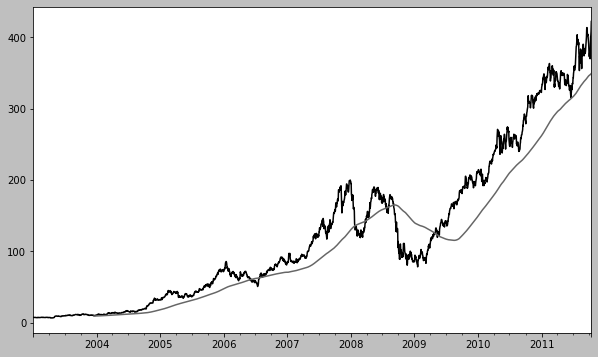

In [226]:
close_px["AAPL"].plot()
#! figure,id=apple_daily_ma250,title="Apple price with 250-day moving average"
close_px["AAPL"].rolling(250).mean().plot(); #rolling().mean()

In [231]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Figure size 720x432 with 0 Axes>

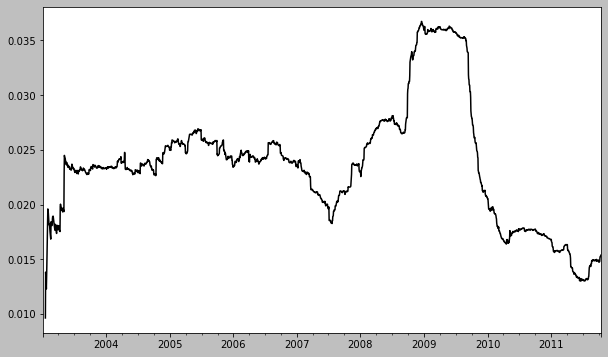

In [232]:
#! figure,id=apple_daily_std250,title="Apple 250-day daily return standard deviation"
std250.plot();

In [233]:
# Define expanding mean in terms of rolling_mean
expanding_mean = std250.expanding().mean()

<Figure size 720x432 with 0 Axes>

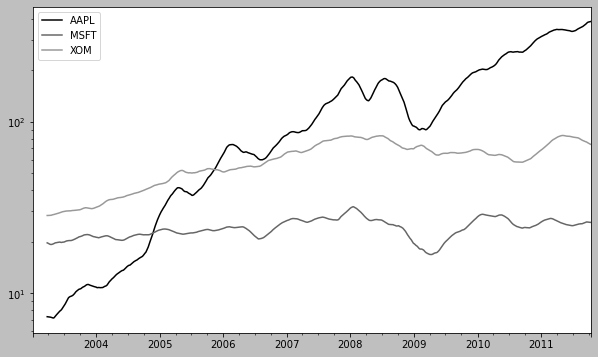

In [235]:
plt.figure()
plt.style.use('grayscale')
#! figure,id=stocks_daily_ma60,title="Stock prices 60-day moving average (log y-axis)"
close_px.rolling(60).mean().plot(logy=True);

Exponentially-weighted functions

In [164]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


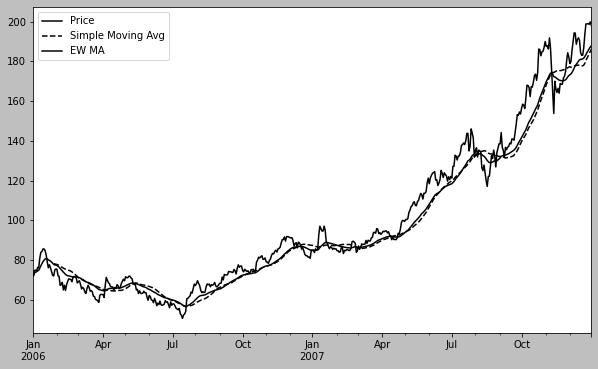

In [236]:
plt.figure()
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
#! figure,id=timeseries_ewma,title="Simple moving average versus exponentially weighted"
plt.legend();

In [237]:
plt.figure()
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Figure size 720x432 with 0 Axes>

Binary Moving Window Functions

<AxesSubplot:>

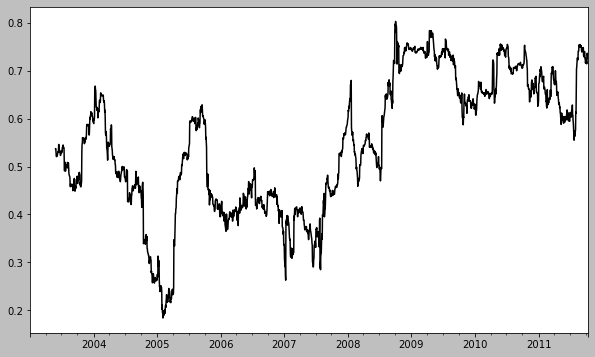

In [238]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
#! figure,id=roll_correl_aapl,title="Six-month AAPL return correlation to S&P 500"
corr.plot()

<Figure size 720x432 with 0 Axes>

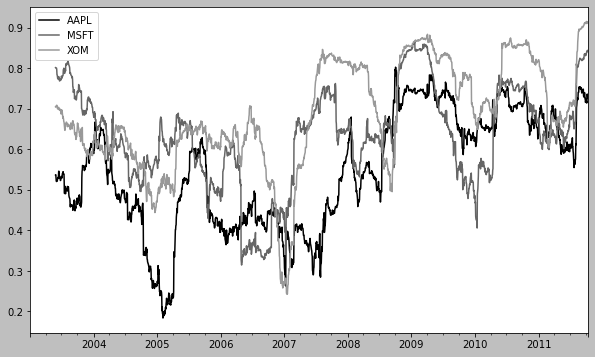

In [243]:
plt.figure()
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
#! figure,id=roll_correl_all,title="Six-month return correlations to S&P 500"
corr.plot();

User-Defined Moving Window Functions

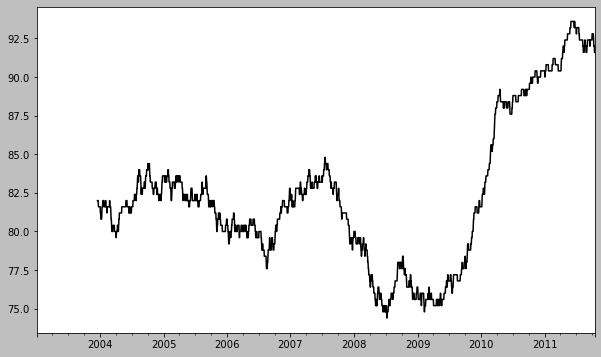

In [242]:
plt.figure()

from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
#! figure,id=roll_apply_ex,title="Percentile rank of 2% AAPL return over one-year window"
result.plot();

In [174]:
# %popd

UsageError: %popd on empty stack


In [244]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS